In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

In [2]:
(x_train, y_train),(x_test, y_test) = cifar10.load_data() 

x_train_orig = x_train / 255
x_test = x_test / 255

y_train_orig = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [3]:
results = {}

for model_number in range(1, 4):
    results[f'model_{model_number}'] = []
    for iteration in range(1, 11):
        model_name = f'model_{model_number}_{iteration}'
        
        model = tf.keras.models.load_model(f'./models/{model_name}.h5')
        
        y_proba = model.predict(x_test)
        y_hat = np.zeros_like(y_proba)
        y_hat[np.arange(y_proba.shape[0]), np.argmax(y_proba, axis=1)] = 1

        model_acc = accuracy_score(y_hat, y_test)
        results[f'model_{model_number}'].append(model_acc)
        
        model=None

In [4]:
results_no_aug = {}

for model_number in range(1, 4):
    results_no_aug[f'model_{model_number}'] = []
    for iteration in range(1, 11):
        model_name = f'model_{model_number}_{iteration}'
        
        model = tf.keras.models.load_model(f'./models/no_aug/{model_name}.h5')
        
        y_proba = model.predict(x_test)
        y_hat = np.zeros_like(y_proba)
        y_hat[np.arange(y_proba.shape[0]), np.argmax(y_proba, axis=1)] = 1

        model_acc = accuracy_score(y_hat, y_test)
        results_no_aug[f'model_{model_number}'].append(model_acc)
        
        model=None

In [5]:
resultsDF = pd.DataFrame(results)
resultsDF

,model_1,model_2,model_3
0,0.8410,0.8451,0.8819
1,0.8417,0.8550,0.8743
2,0.8484,0.8443,0.8580
3,0.8199,0.8468,0.8747
4,0.8385,0.8426,0.8396
5,0.8549,0.8607,0.8756
6,0.8372,0.8328,0.8741
7,0.8267,0.8516,0.8750
8,0.8457,0.8393,0.8768
9,0.8349,0.8544,0.8673


In [6]:
resultsDF_no_aug = pd.DataFrame(results_no_aug)
resultsDF_no_aug

,model_1,model_2,model_3
0,0.7497,0.7666,0.7702
1,0.7550,0.7505,0.7877
2,0.7304,0.7440,0.7816
3,0.7479,0.7702,0.7768
4,0.7485,0.7555,0.7943
5,0.7359,0.7466,0.7954
6,0.7437,0.7552,0.8010
7,0.7601,0.7524,0.7678
8,0.7410,0.7437,0.7742
9,0.7594,0.7300,0.7988


In [7]:
stats = resultsDF.describe()

In [8]:
means_aug = np.mean(resultsDF, axis=0).to_numpy()
error_aug = np.std(resultsDF, axis=0).to_numpy()

NameError: name 'means' is not defined

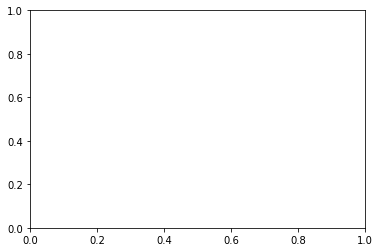

In [9]:
fig, ax = plt.subplots()


ax.bar(np.arange(len(means)), means, yerr=error, capsize=5)
ax.set_xticks(np.arange(len(means)))
ax.set_xticklabels(resultsDF.columns)
plt.ylim(0.8, 0.9)

ax.yaxis.grid(True)

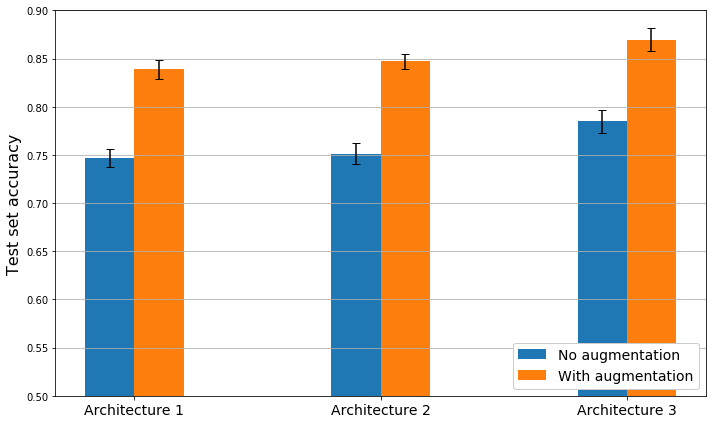

In [22]:
labels = ['Architecture 1', 'Architecture 2', 'Architecture 3']


means_no_aug = np.mean(resultsDF_no_aug, axis=0).to_numpy()
error_no_aug = np.std(resultsDF_no_aug, axis=0).to_numpy()

means_aug = np.mean(resultsDF, axis=0).to_numpy()
error_aug = np.std(resultsDF, axis=0).to_numpy()

label_location = np.arange(len(labels))  
width = 0.20  

fig, ax = plt.subplots(figsize=(10,6))

rects1 = ax.bar(label_location - width/2,
                means_no_aug, width, label='No augmentation',
                yerr=error_no_aug, capsize=4)
rects2 = ax.bar(label_location + width/2,
                means_aug, width, label='With augmentation',
                yerr=error_aug, capsize=4)

ax.set_ylabel('Test set accuracy', fontsize=16)
ax.set_xticks(label_location)
ax.set_xticklabels(labels, fontsize=14)
ax.legend(fontsize=14, loc='lower right', framealpha=1)

plt.ylim(0.5, 0.9)

ax.yaxis.grid(True)

fig.tight_layout()

plt.savefig('results_plain_cnn.png', bbox_inches='tight')
plt.show()

In [38]:
to_latex = resultsDF_no_aug.describe().T[['mean', 'std']]

In [39]:
to_latex[['mean_aug', 'std_aug']] = resultsDF.describe().T[['mean', 'std']]

In [40]:
to_latex

,mean,std,mean_aug,std_aug
model_1,0.74716,0.009690,0.83889,0.010185
model_2,0.75147,0.011607,0.84726,0.008288
model_3,0.78478,0.012285,0.86973,0.012366


In [41]:
print(to_latex.to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &     mean &       std &  mean\_aug &   std\_aug \\
\midrule
model\_1 &  0.74716 &  0.009690 &   0.83889 &  0.010185 \\
model\_2 &  0.75147 &  0.011607 &   0.84726 &  0.008288 \\
model\_3 &  0.78478 &  0.012285 &   0.86973 &  0.012366 \\
\bottomrule
\end{tabular}



In [3]:
import numpy as np

In [6]:
A = np.zeros((2, 3))

In [7]:
np.random.uniform(-0.05, 0.05, A.shape)

array([[ 0.02508829,  0.0278974 ,  0.04737437],
       [ 0.01625296, -0.00878061,  0.02035244]])